In [1]:
import pandas as pd

In [6]:
data = pd.read_csv('data-review-clean-3.csv')
df = pd.DataFrame(data)

In [7]:
df.head()

,types,tones,undertones,age,periode,content,buy,recommend,likes
0,oily,medium light,cool,25 - 29,1 month - 3 months,beli ini impulsif aja karena murah lol walaup...,watson,recommends this product,5
1,normal,medium dark,warm,19 - 24,more than 1 year,toner pertamaku dan suka banget teksturnya ri...,transmart,recommends this product,0
2,combination,medium,neutral,19 - 24,1 month - 3 months,first time nyoba produk ini yang 30ml dan gak ...,shopee,recommends this product,0
3,normal,medium light,neutral,19 - 24,6 months - 1 year,produk ini pernah vital dan jadilah susah untu...,transmart,recommends this product,0
4,dry,medium,neutral,19 - 24,more than 1 year,hydrating toner andalan banget udah repurchase...,tokopedia,recommends this product,0


In [5]:
df.head()

,types,tones,undertones,age,periode,content,buy,recommend,likes
0,normal,medium dark,warm,19 - 24,more than 1 year,toner pertamaku dan suka banget teksturnya ri...,transmart,recommends this product,0
1,combination,medium,neutral,19 - 24,1 month - 3 months,first time nyoba produk ini yang 30ml dan gak ...,shopee,recommends this product,0
2,normal,medium light,neutral,19 - 24,6 months - 1 year,produk ini pernah vital dan jadilah susah untu...,transmart,recommends this product,0
3,dry,medium,neutral,19 - 24,more than 1 year,hydrating toner andalan banget udah repurchase...,tokopedia,recommends this product,0
4,combination,medium,neutral,19 - 24,1 month - 3 months,gacocokkkkk emang bener jangan ekspektasi keb...,shopee,doesnt recommend this product,0


untuk saat ini saya hanya akan menggunakan beberapa kolom dari data review,  
yaitu kolom-kolom selain kolom **content**.  
jadi, saya hapus dulu ya, kolom **content** biar lebih ringkas.  
  
  
*kolom **content** bisa digunakan untuk menganalisis sentimen pengguna,  
tapi kali ini saya skip dulu ya*  
  
selain itu  
*variabel **tones** dan **undertones** untuk produk ini untuk sementara diabaikan,  
karena keduanya tidak memiliki pengaruh secara signifikan*

In [8]:
df2 = df.copy()

In [9]:
df2 = df2.drop('content', axis=1)

In [10]:
df2.head(10)

,types,tones,undertones,age,periode,buy,recommend,likes
0,oily,medium light,cool,25 - 29,1 month - 3 months,watson,recommends this product,5
1,normal,medium dark,warm,19 - 24,more than 1 year,transmart,recommends this product,0
2,combination,medium,neutral,19 - 24,1 month - 3 months,shopee,recommends this product,0
3,normal,medium light,neutral,19 - 24,6 months - 1 year,transmart,recommends this product,0
4,dry,medium,neutral,19 - 24,more than 1 year,tokopedia,recommends this product,0
5,combination,medium,neutral,19 - 24,1 month - 3 months,shopee,doesnt recommend this product,0
6,combination,medium light,warm,18 and under,6 months - 1 year,shopee,recommends this product,0
7,dry,light,cool,35 - 39,more than 1 year,tokopedia,recommends this product,0
8,oily,light,cool,18 and under,less than 1 week,shopee,recommends this product,1
9,oily,medium,neutral,19 - 24,more than 1 year,official brand store,recommends this product,0


oke, mari kita mulai  
  
  
eh bentar, kalo diliat-liat datanya masih kurang ringkas nih  
saya ganti dulu ya beberapa data yang kurang ringkas dalam tiap kolom

mari persingkat isi dari kolom **recommend**

**before**

In [11]:
df2.groupby('recommend').size()

recommend
doesnt recommend this product     69
recommends this product          921
dtype: int64

In [12]:
df2.loc[df['recommend'] == 'recommends this product', ['recommend']] = 'yes'
df2.loc[df['recommend'] == 'doesnt recommend this product', ['recommend']] = 'no'

**after**

In [13]:
df2.groupby('recommend').size()

recommend
no      69
yes    921
dtype: int64

**before**

In [14]:
df2.groupby('age').size()

age
18 and under    220
19 - 24         544
25 - 29         170
30 - 34          42
35 - 39          12
40 - 44           1
45 and above      1
dtype: int64

In [15]:
df2.loc[df2['age'] == '18 and under', ['age']] = '<= 18'
df2.loc[df2['age'] == '45 and above', ['age']] = '>= 45'

**after**

In [16]:
df2.groupby('age').size()

age
19 - 24    544
25 - 29    170
30 - 34     42
35 - 39     12
40 - 44      1
<= 18      220
>= 45        1
dtype: int64

next >>>

**before**

In [17]:
df2.groupby('periode').size()

periode
1 month - 3 months     245
1 week - 1 month       140
3 months - 6 months    186
6 months - 1 year      133
less than 1 week        66
more than 1 year       220
dtype: int64

In [18]:
df2.loc[df2['periode'] == '1 month - 3 months', ['periode']] = '1 - 3 months'
df2.loc[df2['periode'] == '1 week - 1 month', ['periode']] = '1 - 4 weeks'
df2.loc[df2['periode'] == '3 months - 6 months', ['periode']] = '3 - 6 months'
df2.loc[df2['periode'] == '6 months - 1 year', ['periode']] = '6 - 12 months'
df2.loc[df2['periode'] == 'less than 1 week', ['periode']] = '< 1 week'
df2.loc[df2['periode'] == 'more than 1 year', ['periode']] = '> 1 year'

**after**

In [19]:
df2.groupby('periode').size()

periode
1 - 3 months     245
1 - 4 weeks      140
3 - 6 months     186
6 - 12 months    133
< 1 week          66
> 1 year         220
dtype: int64

In [20]:
df2.head()

,types,tones,undertones,age,periode,buy,recommend,likes
0,oily,medium light,cool,25 - 29,1 - 3 months,watson,yes,5
1,normal,medium dark,warm,19 - 24,> 1 year,transmart,yes,0
2,combination,medium,neutral,19 - 24,1 - 3 months,shopee,yes,0
3,normal,medium light,neutral,19 - 24,6 - 12 months,transmart,yes,0
4,dry,medium,neutral,19 - 24,> 1 year,tokopedia,yes,0


### persentase 'recommend' dan 'not recommend'

In [21]:
round(df2.groupby('recommend').size().sort_values(ascending=False)/len(df2)*100, 2)

recommend
yes    93.03
no      6.97
dtype: float64

waw, **93.03 %** merekomendasikan produk ini

### coba kita lihat persentase jumlah review berdasarkan **tipe kulit**

In [22]:
round(df2.groupby('types').size().sort_values(ascending=False)/len(df2)*100, 2)

types
combination    47.98
dry            22.32
oily           18.48
normal         11.11
25 - 29         0.10
dtype: float64

oke, didominasi oleh reviewer dengan tipe kulit **kombinasi** sebanyak **47.98 %**

### kalo persentase jumlah reviewer berdasarkan umur

In [23]:
round(df2.groupby('age').size().sort_values(ascending=False)/len(df2)*100, 2)

age
19 - 24    54.95
<= 18      22.22
25 - 29    17.17
30 - 34     4.24
35 - 39     1.21
>= 45       0.10
40 - 44     0.10
dtype: float64

**54.95 %** reviewer memiliki usia direntang **19 - 24 tahun**  
  
lanjut >>>

### persentase berdasarkan periode pemakaian

In [24]:
round(df2.groupby('periode').size().sort_values(ascending=False)/len(df2)*100, 2)

periode
1 - 3 months     24.75
> 1 year         22.22
3 - 6 months     18.79
1 - 4 weeks      14.14
6 - 12 months    13.43
< 1 week          6.67
dtype: float64

didominasi oleh pemakaian dengan periode **1 - 3 bulan** dan **> 1 tahun**  
dengan nilai persentase yang hampir sama di **24.75%** dan **22.22%**

### persentase berdasarkan tempat pembelian

In [25]:
round(df2.groupby('buy').size().sort_values(ascending=False)/len(df2)*100, 2)

buy
shopee                  63.33
guardian                 6.87
watson                   5.25
tokopedia                3.54
traditional market       3.03
                        ...  
pamella                  0.10
hero                     0.10
griya plaza sumedang     0.10
griya                    0.10
yogya supermarket        0.10
Length: 61, dtype: float64

**63.33%** belinya di si oren

kalo review dengan dukungan terbanyak ada dimana ya?

In [33]:
df2.sort_values(by='likes', ascending=False).nlargest(20, columns='likes').reset_index()

,index,types,tones,undertones,age,periode,buy,recommend,likes
0,402,normal,medium light,neutral,19 - 24,1 - 4 weeks,shopee,yes,74
1,891,combination,medium dark,neutral,19 - 24,1 - 3 months,tokopedia,yes,64
2,890,combination,medium light,neutral,<= 18,1 - 4 weeks,aeon,yes,37
3,290,combination,medium,warm,19 - 24,3 - 6 months,shopee,yes,37
4,695,combination,medium light,cool,25 - 29,3 - 6 months,gift,yes,33
5,859,combination,medium light,cool,19 - 24,6 - 12 months,shopee,yes,32
6,600,oily,medium light,warm,19 - 24,1 - 3 months,shopee,yes,28
7,622,dry,medium,neutral,19 - 24,1 - 3 months,shopee,yes,24
8,735,combination,medium light,warm,30 - 34,1 - 3 months,shopee,yes,24
9,371,normal,medium,neutral,19 - 24,1 - 4 weeks,shopee,yes,21


wah, **19** dari **20** review dengan *dukungan terbanyak* **merekomendasikan** produk ini,  
tapi, ada **1** review dengan *dukungan terbanyak* yang **tidak merekomendasikan**  

mari kita lihat isi reviewnya

In [34]:
pd.set_option('display.max_colwidth', 300)
df.loc[[91]]

,types,tones,undertones,age,periode,content,buy,recommend,likes
91,combination,medium,neutral,18 and under,1 month - 3 months,agak bingung sih sebenernya ini tuh bikin mukaku terhidrasi banget lembab kenyal gitu abis pake ini tapi setelah bbrp malem pake ini muncul jerawat di pipi dan beruntusan di jidiat dan jerawat aku yang lagi meradang yg tdnya putih2nya udh keluar eh sakit lagi pas pake ini bye bye hadalabo,shopee,doesnt recommend this product,20


reviewer mengalami masalah **jerawat yang muncul dan beruntusan** setelah pemakaian,  
dengan tipe kulit **kombinasi**  
usia **<= 18 tahun** dengan periode pemakaian **1 - 3 bulan** (jumlah dukungan 20)  
  
  
*jumlah dukungan: sejumlah orang memiliki kondisi yang sama*  
*variabel **tones** dan **undertones** untuk produk ini untuk sementara diabaikan,  
karena keduanya tidak memiliki pengaruh secara signifikan*

oke, saya highlight dulu review dengan tipe kulit **kombinasi**,  
untuk mengetahui kecenderungan mereka terhadap pemakaian produk ini.  
kebetulan tipe kulit saya juga sama, heheu  
selain itu tipe kulit **kombinasi** juga mendominasi jumlah review.

## tipe kulit kombinasi

In [35]:
round(df2.loc[df2['types'] == 'combination'].groupby('types')['age'].value_counts(range)*100, 2)

types        age    
combination  19 - 24    50.53
             <= 18      26.11
             25 - 29    17.89
             30 - 34     3.58
             35 - 39     1.89
Name: age, dtype: float64

pada tipe kulit **kombinasi**, responden dengan rentang usia **19 - 24 tahun** mendominasi (**50.53 %**)  
disusul responden dengan rentang usia **<= 18 tahun** (**26.11 %**)

sekarang coba kita lihat **periode pemakaian** dari masing-masing **rentang usia**

In [36]:
round(df2.loc[df2['types'] == 'combination'].groupby(['types', 'age'])['periode'].value_counts(range)*100, 2)

types        age      periode      
combination  19 - 24  > 1 year         29.58
                      1 - 3 months     22.08
                      1 - 4 weeks      16.67
                      3 - 6 months     14.58
                      6 - 12 months    12.92
                      < 1 week          4.17
             25 - 29  1 - 3 months     28.24
                      3 - 6 months     22.35
                      > 1 year         21.18
                      6 - 12 months    10.59
                      < 1 week          9.41
                      1 - 4 weeks       8.24
             30 - 34  6 - 12 months    29.41
                      1 - 3 months     17.65
                      1 - 4 weeks      17.65
                      > 1 year         17.65
                      < 1 week         11.76
                      3 - 6 months      5.88
             35 - 39  1 - 3 months     33.33
                      < 1 week         22.22
                      1 - 4 weeks      11.11
                   

jadi **rentang usia**  
**19 - 24** didominasi periode pemakaian **> 1 tahun**  
**25 - 29** didominasi periode pemakaian **1 - 3 bulan**  
**30 - 34** didominasi periode pemakaian **6 - 12 bulan**  
**35 - 39** didominasi periode pemakaian **1 - 3 bulan**  
**<= 18** didominasi periode pemakaian **1 - 3 bulan**  

### jumlah reviewer (combination) berdasarkan **rentang usia** dan pemakaian > 1 tahun

In [38]:
df2[df2['types'] == 'combination'].groupby(df2.loc[df2['periode'] == '> 1 year', 'age'])['periode'].value_counts()

age      periode 
19 - 24  > 1 year    71
25 - 29  > 1 year    18
30 - 34  > 1 year     3
35 - 39  > 1 year     1
<= 18    > 1 year     9
Name: periode, dtype: int64

<AxesSubplot:title={'center':'tipe kulit kombinasi dengan periode pemakaian > 1 tahun berdasarkan rentang usia'}, ylabel='age,periode'>

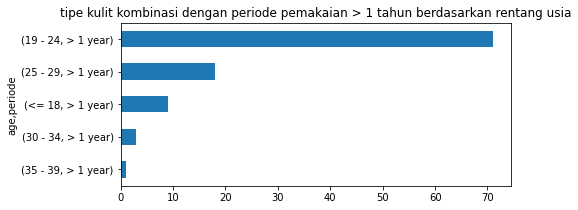

In [39]:
df2[df2['types'] == 'combination'].groupby(df2.loc[df2['periode'] == '> 1 year', 'age'])['periode'].value_counts().sort_values().\
plot(kind='barh', title='tipe kulit kombinasi dengan periode pemakaian > 1 tahun berdasarkan rentang usia', figsize=(7,3))

jika dilihat, untuk tipe kulit **kombinasi**  
reviewer yang sering **repurchase** ada di **rentang usia 19 - 24 tahun** (dewasa-cocok)

### rentang usia dengan pemakain < 1 minggu

<AxesSubplot:title={'center':'tipe kulit kombinasi dengan periode pemakaian < 1 minggu berdasarkan rentang usia'}, ylabel='age,periode'>

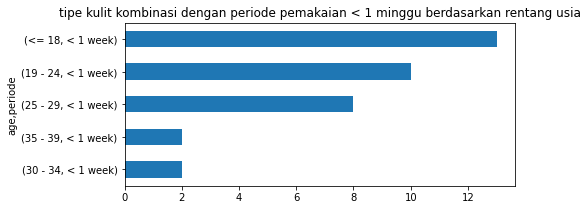

In [40]:
df2[df2['types'] == 'combination'].groupby(df2.loc[df2['periode'] == '< 1 week', 'age'])['periode'].value_counts().sort_values().\
plot(kind='barh', title='tipe kulit kombinasi dengan periode pemakaian < 1 minggu berdasarkan rentang usia', figsize=(7,3))

reviewer yang masih baru mencoba produk paling banyak di **rentang usia <= 18 tahun** (remaja-coba)

#### perbandingan rekomendasi dan tidak rekomendasi berdasarkan rentang usia dan periode pemakaian

In [41]:
round(df2[df2['types'] == 'combination'].groupby(['age', 'periode'])['recommend'].value_counts(range)*100, 2)

age      periode        recommend
19 - 24  1 - 3 months   yes           90.57
                        no             9.43
         1 - 4 weeks    yes           90.00
                        no            10.00
         3 - 6 months   yes           97.14
                        no             2.86
         6 - 12 months  yes           96.77
                        no             3.23
         < 1 week       yes           80.00
                        no            20.00
         > 1 year       yes          100.00
25 - 29  1 - 3 months   yes           95.83
                        no             4.17
         1 - 4 weeks    yes           85.71
                        no            14.29
         3 - 6 months   yes          100.00
         6 - 12 months  yes           88.89
                        no            11.11
         < 1 week       no            62.50
                        yes           37.50
         > 1 year       yes          100.00
30 - 34  1 - 3 months   yes           66.6

In [42]:
df2[df2['recommend'] == 'yes'].groupby(df2.loc[df2['types'] == 'combination', 'age'], sort=False)['periode'].max()

age
19 - 24    > 1 year
<= 18      > 1 year
25 - 29    > 1 year
30 - 34    > 1 year
35 - 39    > 1 year
Name: periode, dtype: object

In [43]:
round(df2[df2['types'] == 'combination'].groupby(df2.loc[df2['recommend'] == 'yes', 'age'], sort=False)['periode'].value_counts(), 2) 

age      periode      
19 - 24  > 1 year         71
         1 - 3 months     48
         1 - 4 weeks      36
         3 - 6 months     34
         6 - 12 months    30
         < 1 week          8
<= 18    1 - 3 months     35
         3 - 6 months     21
         1 - 4 weeks      20
         6 - 12 months    17
         < 1 week         12
         > 1 year          9
25 - 29  1 - 3 months     23
         3 - 6 months     19
         > 1 year         18
         6 - 12 months     8
         1 - 4 weeks       6
         < 1 week          3
30 - 34  6 - 12 months     5
         1 - 4 weeks       3
         > 1 year          3
         1 - 3 months      2
         < 1 week          2
         3 - 6 months      1
35 - 39  1 - 3 months      2
         3 - 6 months      1
         6 - 12 months     1
         < 1 week          1
         > 1 year          1
Name: periode, dtype: int64

***Bersambung***

Sekian dan terima kasih, semoga bermanfaat.